# Computer Vision

## Lab 1

### Imports
- [x] OpenCV: computer vision library (import cv2)
- [x] NumPy: n-dimensional arrays and math (import numpy as np)
- [x] SciPy: scientific computing and stats (import scipy.stats)
- [x] SciKit-image: image processing and color conversion (import skimage)
- [ ] ImageIO: easy image/video reading/writing (import imageio)
- [x] mpmath: arbitrary precision floating point operations (import mpmath)
- [x] matplotlib: plotting (import matplotlib.pyplot as plt)
- [x] seaborn: matplotlib wrapper (import seaborn as sns)
- [x] Python Image Library: alternative image processing (import PIL)

In [142]:
# Imports
import cv2
import numpy as np
import scipy.stats
import skimage
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

### Define Images

In [128]:
# Images
image_35 = "image-35.jpg"
image_83 = "image-83.jpg"
image_110 = "image-110.jpg"

images = [image_35, image_83, image_110]

# Masks
mask_35 = "mask-35.png"
mask_83 = "mask-83.png"
mask_110 = "mask-110.png"

masks = [mask_35, mask_83, mask_110]

# All
all = images + masks

### Input (images)

In [129]:
def display_image(name):
    with PIL.Image.open(f"work/assets/{name}") as image:
        plt.imshow(image)
        
def display_grayscale(name):
    with PIL.Image.open(f"work/assets/{name}") as image:
        arr = np.asarray(image)
        grayscale = skimage.color.rgb2gray(arr)
        plt.imshow(grayscale, cmap="gray")

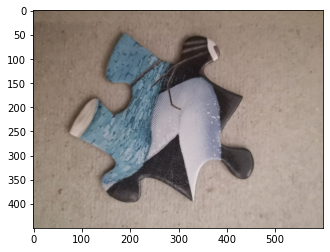

In [130]:
display_image(image_35)

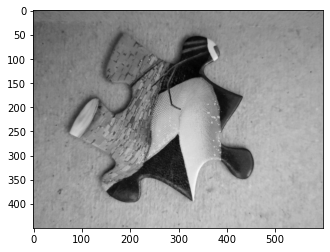

In [131]:
display_grayscale(image_35)

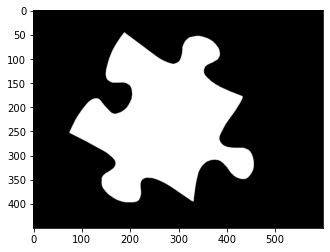

In [132]:
display_image(mask_35)

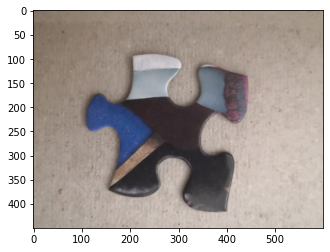

In [133]:
display_image(image_83)

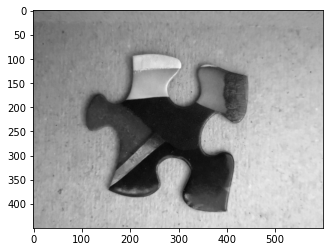

In [134]:
display_grayscale(image_83)

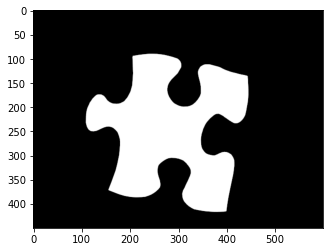

In [135]:
display_image(mask_83)

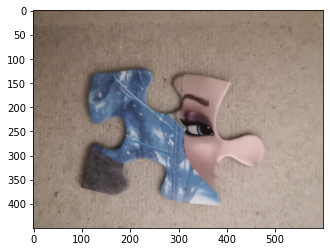

In [136]:
display_image(image_110)

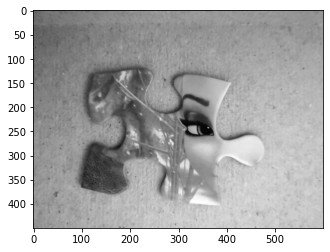

In [137]:
display_grayscale(image_110)

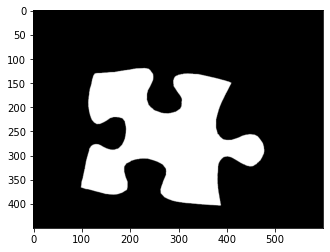

In [138]:
display_image(mask_110)

### Section 4 -  Descriptive Statistics

#### Questions 1, 2 and 3

In [139]:
def image_description(name):
    with PIL.Image.open(f"work/assets/{name}") as image:
        print(name)
        print(f"1. {image.width} (width)")
        print(f"2. {image.height} (height)")
        print(f"3. {image.width * image.height} pixels\n")

for name in images:
    image_description(name)

image-35.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-83.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-110.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels



#### Questions 4 & 5

In [140]:
def count_black_white(name):
    black_count, white_count = 0, 0
    with PIL.Image.open(f"work/assets/{name}") as image:
        rgb_image = image.convert(mode="RGB")
        for x in range(rgb_image.width):
            for y in range(rgb_image.height):
                if rgb_image.getpixel((x, y)) == (255, 255, 255):
                    white_count += 1
                else:
                    black_count += 1
    return black_count, white_count

for name in masks:
    black, white = count_black_white(name)
    print(name)
    print(f"4. {black} black pixels")
    print(f"5. {white} white pixels\n")

mask-35.png
4. 196804 black pixels
5. 73196 white pixels

mask-83.png
4. 211051 black pixels
5. 58949 white pixels

mask-110.png
4. 210536 black pixels
5. 59464 white pixels



#### Question 6 & 7

In [1]:
def min_max_pixels(name):
    with PIL.Image.open(f"work/assets/{name}") as image:
        arr = np.asarray(image)
        grayscale = skimage.color.rgb2gray(arr)
        return np.amin(grayscale), np.amax(grayscale)
        
for name in images:
    min, max = min_max_pixels(name)
    
    print(name)
    print(f"6. {min} (min)")
    print(f"7. {max} (max)\n")

NameError: name 'images' is not defined